In [54]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('kkboxmusicrecommendation_notebook_v7.ipynb'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [55]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from subprocess import check_output
np.random.seed(2020)

In [56]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
song_df = pd.read_csv("songs.csv")
song_extra_df = pd.read_csv("song_extra_info.csv")
members_df = pd.read_csv("members.csv")

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [58]:
train_df.count()

msno                  7377418
song_id               7377418
source_system_tab     7352569
source_screen_name    6962614
source_type           7355879
target                7377418
dtype: int64

In [59]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [60]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [61]:
test_df.count()

id                    2556790
msno                  2556790
song_id               2556790
source_system_tab     2548348
source_screen_name    2393907
source_type           2549493
dtype: int64

In [62]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [63]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [64]:
song_df.count()

song_id        2296320
song_length    2296320
genre_ids      2202204
artist_name    2296320
composer       1224962
lyricist        351014
language       2296319
dtype: int64

In [65]:
song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [66]:
print("Unique Song amount in trainset:",train_df['song_id'].nunique())
print("Unique Song amount in testset:", test_df['song_id'].nunique())
print("Unique Song amount in song list:",song_df['song_id'].nunique())

Unique Song amount in trainset: 359966
Unique Song amount in testset: 224753
Unique Song amount in song list: 2296320


In [67]:
song_extra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [68]:
song_extra_df.count()

song_id    2295971
name       2295968
isrc       2159423
dtype: int64

In [69]:
song_extra_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [70]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [71]:
user_music_df = train_df.merge(song_df,on='song_id',how="left", copy =False)
user_music_df["song_id"] = user_music_df["song_id"].astype("category")
user_music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0


In [72]:
user_music_df['song_id'].nunique(), user_music_df['genre_ids'].nunique()

(359966, 572)

In [73]:
user_music_df.count()

msno                  7377418
song_id               7377418
source_system_tab     7352569
source_screen_name    6962614
source_type           7355879
target                7377418
song_length           7377304
genre_ids             7258963
artist_name           7377304
composer              5701712
lyricist              4198606
language              7377268
dtype: int64

Text(0.5, 0, 'Count')

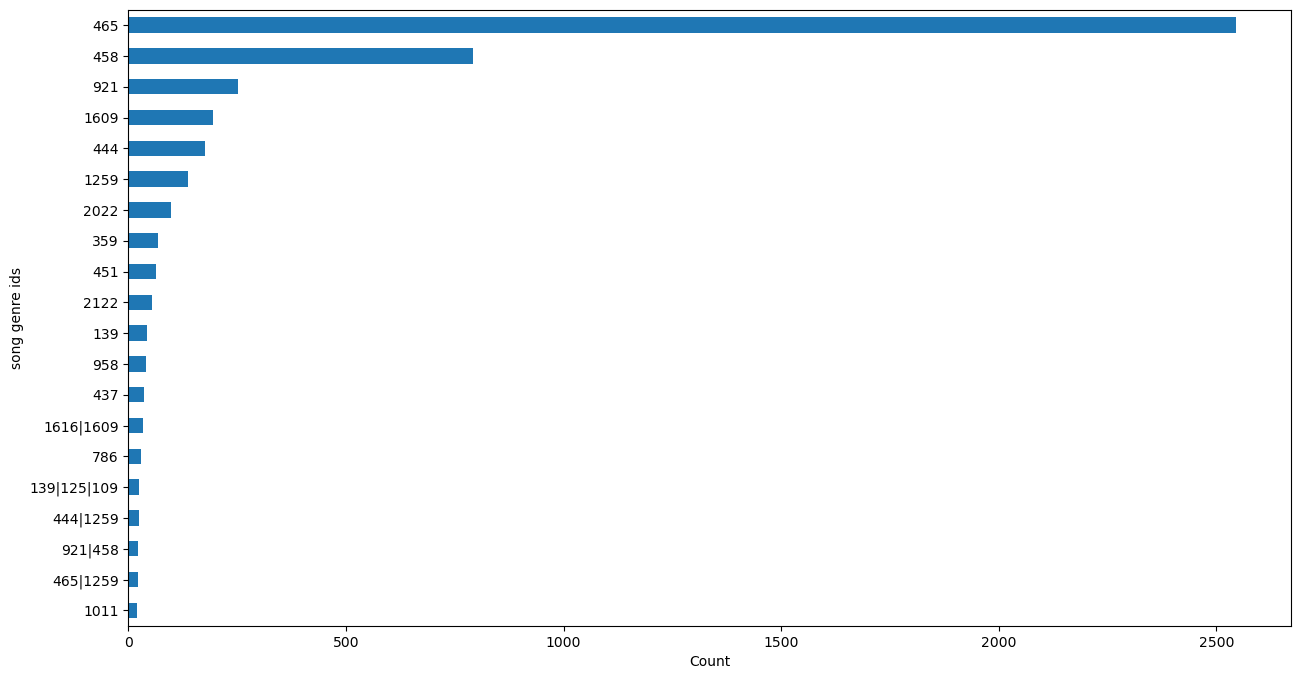

In [74]:
df_genre = user_music_df.sample(n=5000)
df_genre = df_genre["genre_ids"].value_counts().sort_values(ascending=False)[:20]
df_genre = df_genre.sort_values(ascending=True)
ax  = df_genre.plot.barh(figsize=(15,8))
ax.set_ylabel("song genre ids")
ax.set_xlabel("Count")


Text(0.5, 0, 'Count')

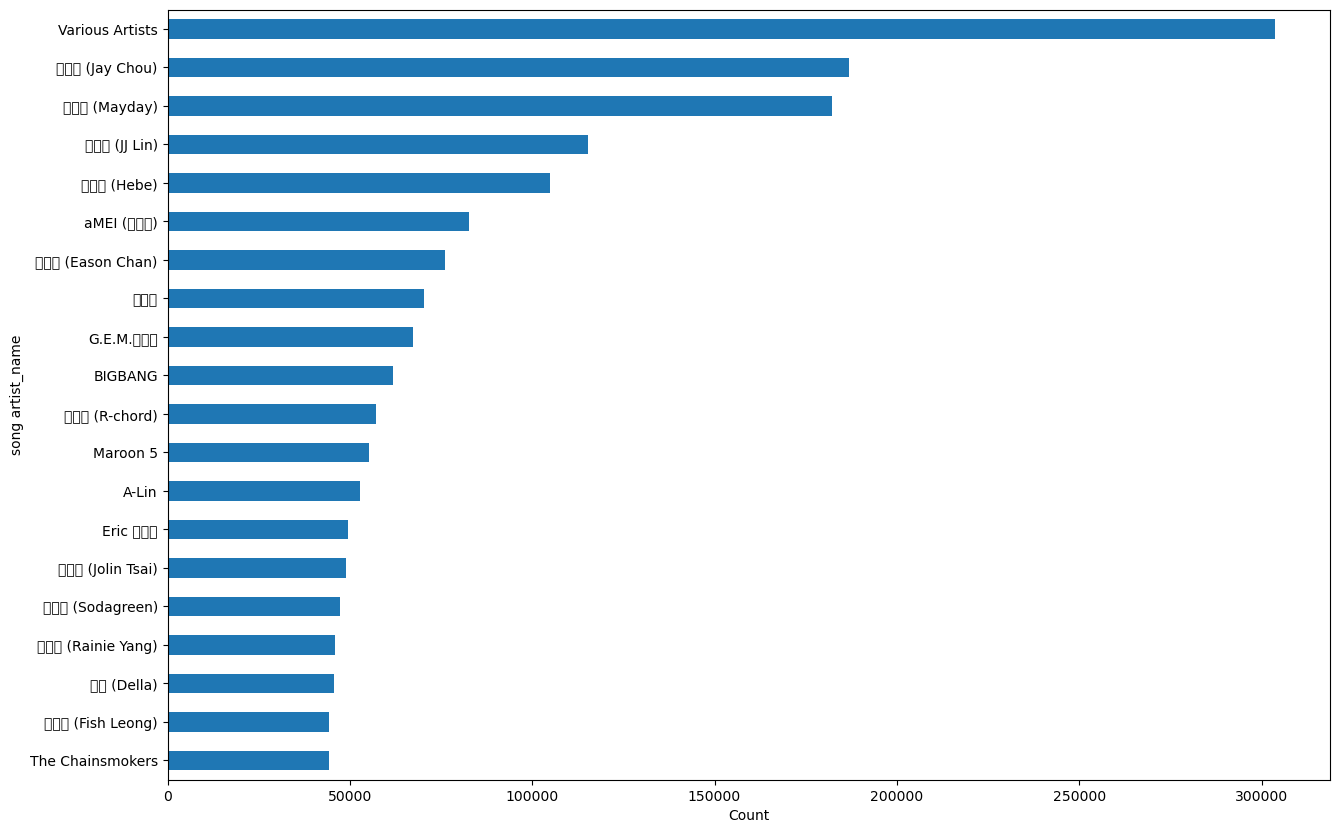

In [75]:
df_artist = user_music_df["artist_name"].value_counts().sort_values(ascending=False)[:20]
df_artist = df_artist.sort_values(ascending=True)
ax  = df_artist.plot.barh(figsize=(15,10))
ax.set_ylabel("song artist_name")
ax.set_xlabel("Count")

In [76]:
df_artist.head(10)

artist_name
The Chainsmokers     44215
梁靜茹 (Fish Leong)     44290
丁噹 (Della)           45762
楊丞琳 (Rainie Yang)    46006
蘇打綠 (Sodagreen)      47177
蔡依林 (Jolin Tsai)     49055
Eric 周興哲             49426
A-Lin                52913
Maroon 5             55151
謝和弦 (R-chord)        57040
Name: count, dtype: int64

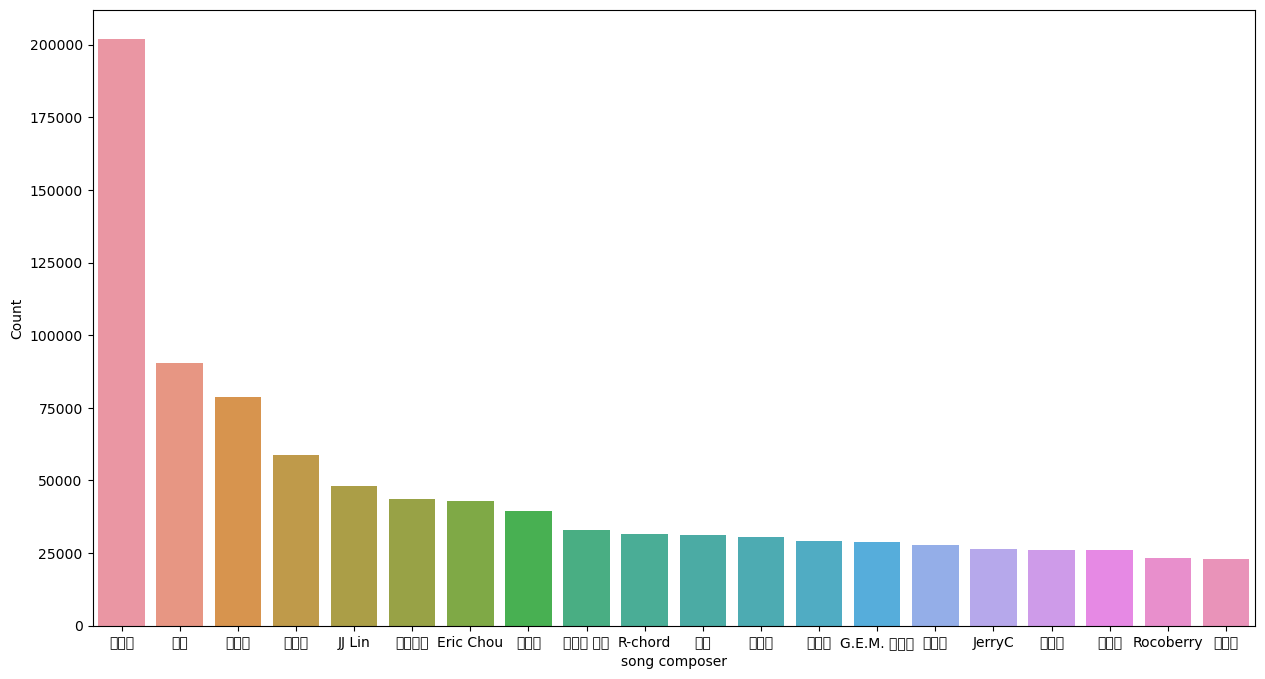

In [77]:
fig, ax = plt.subplots(1, figsize=(15, 8))
df_composer = user_music_df["composer"].value_counts().sort_values(ascending=False)[:20]
ax = sns.barplot(x=df_composer.index, y=df_composer, ax=ax)
ax.set_xlabel("song composer")
ax.set_ylabel("Count")
plt.show()

In [78]:
df_composer.head(20).index

Index(['周杰倫', '阿信', '林俊傑', '陳皓宇', 'JJ Lin', '張簡君偉', 'Eric Chou', '韋禮安',
       '八三夭 阿璞', 'R-chord', '怪獸', '吳青峰', '周湯豪', 'G.E.M. 鄧紫棋', '陳小霞', 'JerryC',
       '吳克群', '薛之謙', 'Rocoberry', '李榮浩'],
      dtype='object', name='composer')

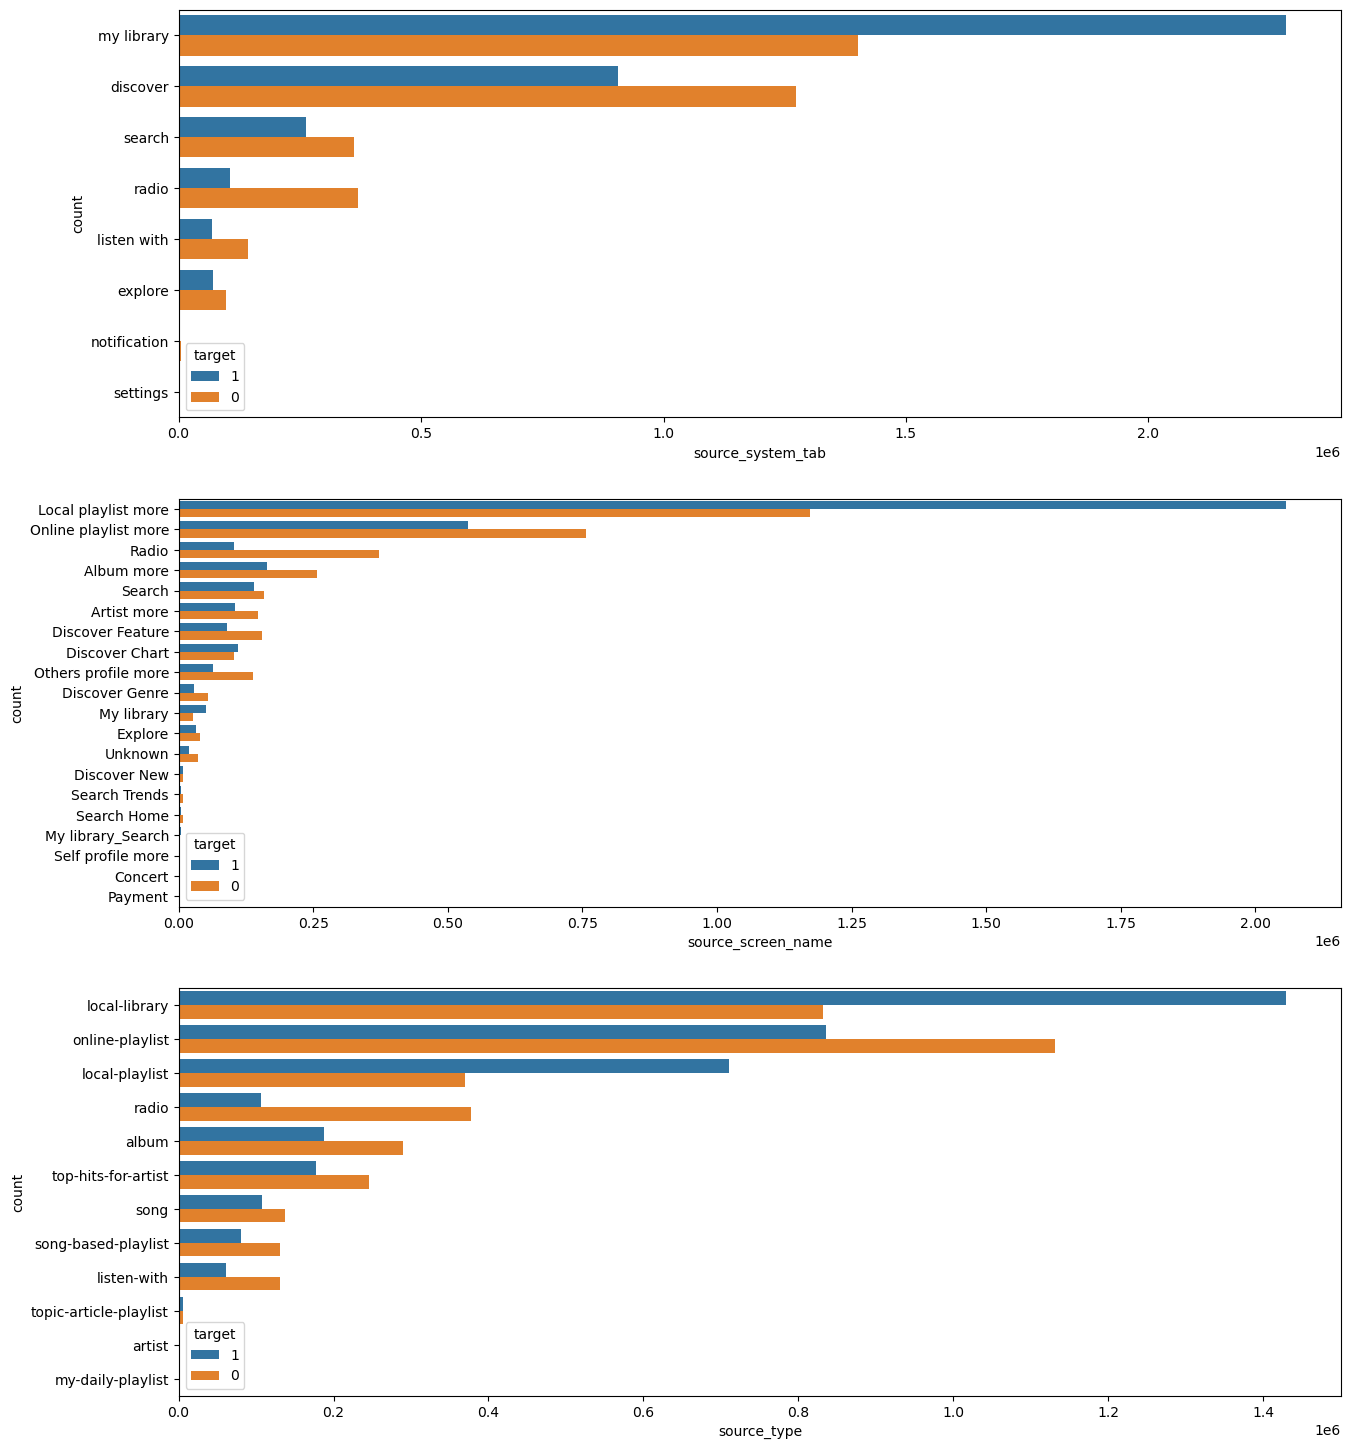

In [79]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))
user_music_df['target'] = user_music_df['target'].astype(str)

sns.countplot(y='source_system_tab', hue='target',
              order=user_music_df['source_system_tab'].value_counts().index,
              data=user_music_df, dodge=True, ax=ax[0])
ax[0].set_xlabel("source_system_tab")
ax[0].set_ylabel("count")

sns.countplot(y='source_screen_name', hue='target',
              order=user_music_df['source_screen_name'].value_counts().index,
              data=user_music_df, dodge=True, ax=ax[1])
ax[1].set_xlabel("source_screen_name")
ax[1].set_ylabel("count")

sns.countplot(y='source_type', hue='target',
              order=user_music_df['source_type'].value_counts().index,
              data=user_music_df, dodge=True, ax=ax[2])
ax[2].set_xlabel("source_type")
ax[2].set_ylabel("count")

plt.show()


In [80]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [81]:
members_df["registration_init_time"] = pd.to_datetime(members_df["registration_init_time"], format="%Y%m%d")
members_df["expiration_date"] = pd.to_datetime(members_df["expiration_date"], format="%Y%m%d")

In [82]:
members_df["registration_init_day"] = members_df["registration_init_time"].dt.day
members_df["registration_init_month"] = members_df["registration_init_time"].dt.month
members_df["registration_init_year"] = members_df["registration_init_time"].dt.year
members_df["expiration_day"] = members_df["expiration_date"].dt.day
members_df["expiration_month"] = members_df["expiration_date"].dt.month
members_df["expiration_year"] = members_df["expiration_date"].dt.year
members_df = members_df.drop(columns = ["registration_init_time", "expiration_date"],axis=1)
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   msno                     34403 non-null  object
 1   city                     34403 non-null  int64 
 2   bd                       34403 non-null  int64 
 3   gender                   14501 non-null  object
 4   registered_via           34403 non-null  int64 
 5   registration_init_day    34403 non-null  int32 
 6   registration_init_month  34403 non-null  int32 
 7   registration_init_year   34403 non-null  int32 
 8   expiration_day           34403 non-null  int32 
 9   expiration_month         34403 non-null  int32 
 10  expiration_year          34403 non-null  int32 
dtypes: int32(6), int64(3), object(2)
memory usage: 2.1+ MB


In [83]:
member_music_df = user_music_df.merge(members_df,on='msno',how="left", copy=False)
member_music_df["msno"] = member_music_df["msno"].astype("category")
member_music_df["song_id"] = member_music_df["song_id"].astype("category")
member_music_df.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,city,bd,gender,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,...,1,0,NaN,7,2,1,2012,5,10,2017
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,...,13,24,female,9,25,5,2011,11,9,2017
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,13,24,female,9,25,5,2011,11,9,2017
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,13,24,female,9,25,5,2011,11,9,2017
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,1,0,NaN,7,2,1,2012,5,10,2017


In [84]:
member_music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 22 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   msno                     category
 1   song_id                  category
 2   source_system_tab        object  
 3   source_screen_name       object  
 4   source_type              object  
 5   target                   object  
 6   song_length              float64 
 7   genre_ids                object  
 8   artist_name              object  
 9   composer                 object  
 10  lyricist                 object  
 11  language                 float64 
 12  city                     int64   
 13  bd                       int64   
 14  gender                   object  
 15  registered_via           int64   
 16  registration_init_day    int32   
 17  registration_init_month  int32   
 18  registration_init_year   int32   
 19  expiration_day           int32   
 20  expiration_month        

In [85]:
member_music_df.count()

msno                       7377418
song_id                    7377418
source_system_tab          7352569
source_screen_name         6962614
source_type                7355879
target                     7377418
song_length                7377304
genre_ids                  7258963
artist_name                7377304
composer                   5701712
lyricist                   4198606
language                   7377268
city                       7377418
bd                         7377418
gender                     4415939
registered_via             7377418
registration_init_day      7377418
registration_init_month    7377418
registration_init_year     7377418
expiration_day             7377418
expiration_month           7377418
expiration_year            7377418
dtype: int64

In [86]:
member_music_df['bd'].describe()

count    7.377418e+06
mean     1.753927e+01
std      2.155447e+01
min     -4.300000e+01
25%      0.000000e+00
50%      2.100000e+01
75%      2.900000e+01
max      1.051000e+03
Name: bd, dtype: float64

Text(0, 0.5, 'count')

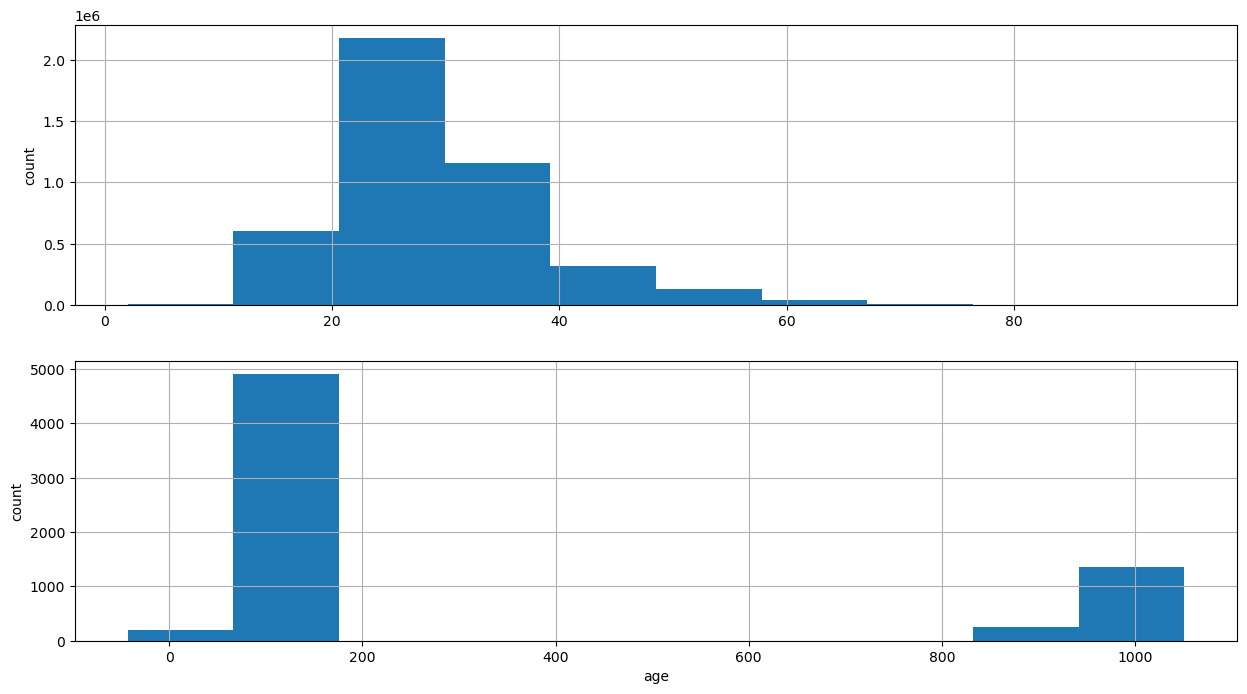

In [87]:
fig, ax = plt.subplots(2, figsize= (15,8))
age_df = member_music_df['bd'].loc[(member_music_df['bd']>0) & (member_music_df['bd']<100)]
age_df.hist(ax = ax[0])
ax[0].set_ylabel("count")
member_music_df['bd'].loc[(member_music_df['bd']<0) | (member_music_df['bd']>100)].hist(ax = ax[1])
ax[1].set_xlabel("age")
ax[1].set_ylabel("count")

In [88]:
member_music_df['bd'].loc[(member_music_df['bd']<=0) | (member_music_df['bd']>=100)]= np.nan

In [89]:
member_music_df.describe()

,song_length,language,city,bd,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year
count,7.377304e+06,7.377268e+06,7.377418e+06,4.430216e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06
mean,2.451210e+05,1.860933e+01,7.511399e+00,2.872200e+01,6.794068e+00,1.581532e+01,6.832306e+00,2.012741e+03,1.562338e+01,8.341742e+00,2.017072e+03
std,6.734471e+04,2.117681e+01,6.641625e+00,8.634326e+00,2.275774e+00,8.768549e+00,3.700723e+00,3.018861e+00,9.107235e+00,2.511360e+00,3.982536e-01
min,1.393000e+03,-1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.970000e+03
25%,2.147260e+05,3.000000e+00,1.000000e+00,2.300000e+01,4.000000e+00,8.000000e+00,3.000000e+00,2.011000e+03,8.000000e+00,9.000000e+00,2.017000e+03
50%,2.418120e+05,3.000000e+00,5.000000e+00,2.700000e+01,7.000000e+00,1.600000e+01,7.000000e+00,2.013000e+03,1.500000e+01,9.000000e+00,2.017000e+03
75%,2.721600e+05,5.200000e+01,1.300000e+01,3.300000e+01,9.000000e+00,2.300000e+01,1.000000e+01,2.015000e+03,2.300000e+01,1.000000e+01,2.017000e+03
max,1.085171e+07,5.900000e+01,2.200000e+01,9.500000e+01,1.300000e+01,3.100000e+01,1.200000e+01,2.017000e+03,3.100000e+01,1.200000e+01,2.020000e+03


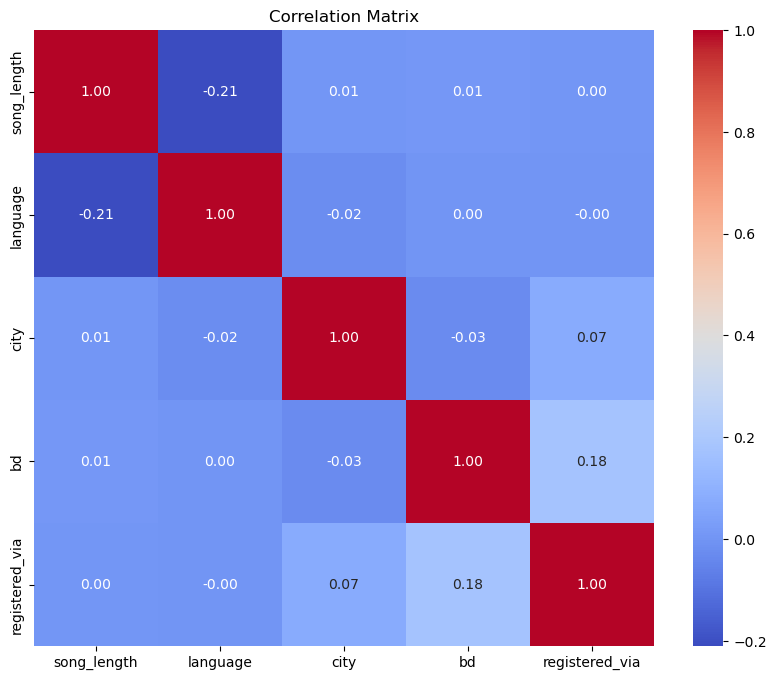

In [90]:
non_numeric_columns = ['column_name1', 'column_name2', ...]

numeric_columns = member_music_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

corr_matrix = member_music_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [91]:
non_numeric_columns = ['genre_ids', 'artist_name', 'composer', 'lyricist', 'gender']

numeric_columns = member_music_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

corr_matrix = member_music_df[numeric_columns].corr()

for column in ['target', 'song_length', 'language', 'city', 'bd', 'registered_via',
               'registration_init_day', 'registration_init_month', 'registration_init_year',
               'expiration_day', 'expiration_month', 'expiration_year']:
    try:
        corr = corr_matrix[column].sort_values(ascending=False)
        for x in corr.index[1:4].to_list():
            print("{} {}".format(x, corr[x]))
        print("")
    except KeyError as e:
        print(f"Skipping {column} as it is not present in the numeric columns for correlation.")
        continue

Skipping target as it is not present in the numeric columns for correlation.
bd 0.009861302779273176
city 0.005184912771082545
registered_via 0.0027491378933093597

bd 0.0011079783941423636
registered_via -0.00023213032064927868
city -0.0221979818785147

registered_via 0.07375561757288539
song_length 0.005184912771082545
language -0.0221979818785147

registered_via 0.17533900158978546
song_length 0.009861302779273176
language 0.0011079783941423636

bd 0.17533900158978546
city 0.07375561757288539
song_length 0.0027491378933093597

Skipping registration_init_day as it is not present in the numeric columns for correlation.
Skipping registration_init_month as it is not present in the numeric columns for correlation.
Skipping registration_init_year as it is not present in the numeric columns for correlation.
Skipping expiration_day as it is not present in the numeric columns for correlation.
Skipping expiration_month as it is not present in the numeric columns for correlation.
Skipping expi

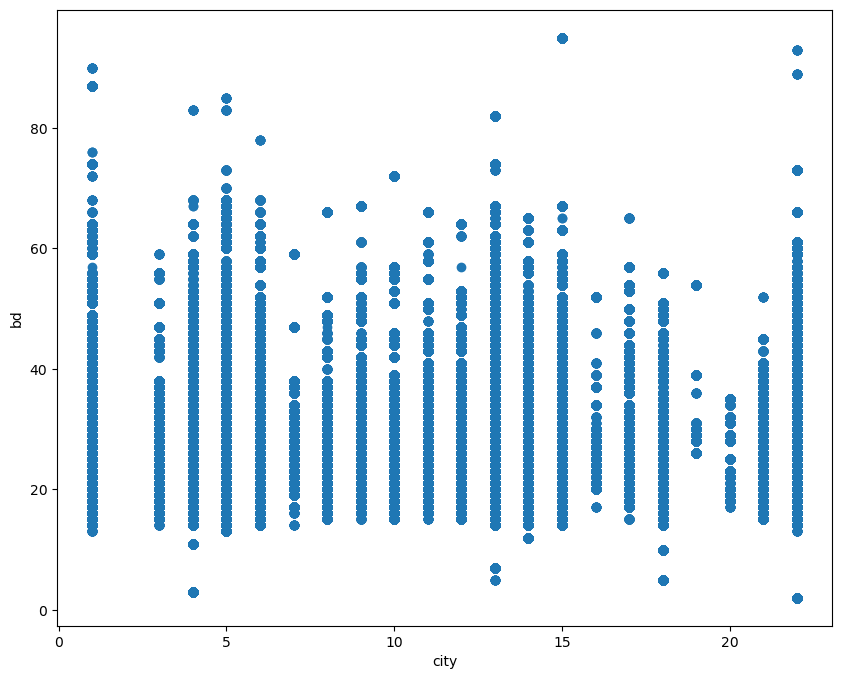

In [92]:
fig, ax = plt.subplots(1,1,figsize=(10,8), sharex=False)
plt.scatter(x = member_music_df['city'],y = member_music_df['bd'])
ax.set_ylabel("bd")
ax.set_xlabel("city")
plt.show()

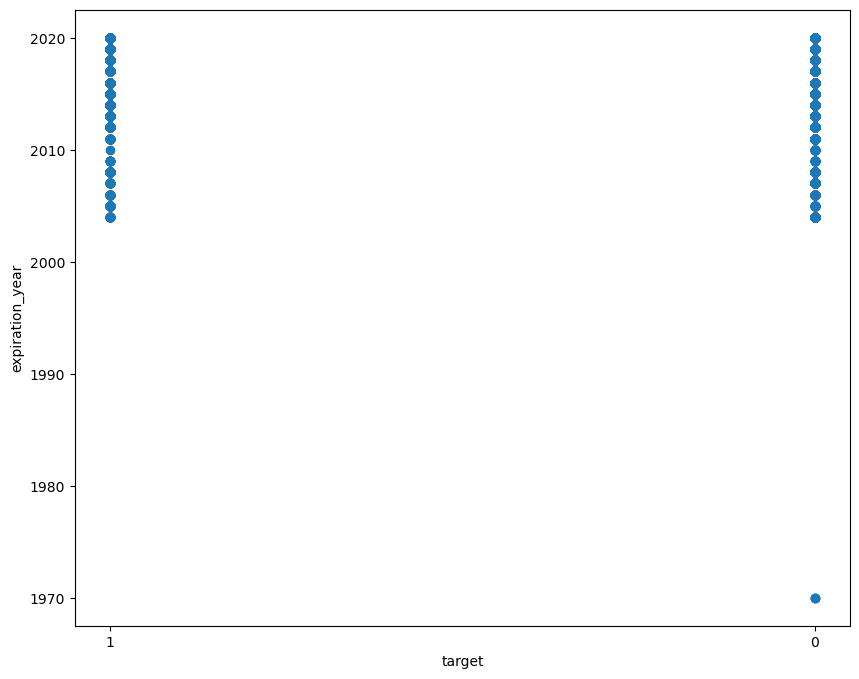

In [93]:
fig, ax = plt.subplots(1,1,figsize=(10,8), sharex=False)
plt.scatter(x = member_music_df['target'],y = member_music_df['expiration_year'])
ax.set_ylabel("expiration_year")
ax.set_xlabel("target")
plt.show()

In [94]:
print(train_df.target.value_counts()*100/train_df.target.value_counts().sum())
print('unique songs ',len(train_df.song_id.unique()))

target
1    50.351708
0    49.648292
Name: count, dtype: float64
unique songs  359966


In [95]:
repeats=train_df[train_df.target==1]
song_repeats=repeats.groupby('song_id',as_index=False).msno.count()
song_repeats.columns=['song_id','count']
song_repeats=pd.DataFrame(song_repeats).merge(song_df,left_on='song_id',right_on='song_id')
print("Print top 50 songs repeated")
repeats.song_id.value_counts().head(50)

Print top 50 songs repeated


song_id
reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    10885
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    10556
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=     9808
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=     9411
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=     9004
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=     8787
YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=     8780
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=     8403
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=     8112
J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=     7903
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=     7725
750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=     7608
IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=     7224
+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=     7061
DLBDZhOoW7zd7GBV99bi92ZXYUS26lzV+jJKbHshP5c=     6901
v/3onppBGoSpGsWb8iaCIO8eX5+iacbH5a4ZUhT7N54=     6879
p/yR06j/RQ2J6yGCFL0K+1R06OeG+eXcwxRgOHDo/Tk=     6536
Xpjwi8UAE2Vv9PZ6cZnhc58MCtl3cKZEO1sdAkqJ4mo=     6399
OaEbZ6TJ1NePtNUeEgWs

In [96]:
missing_value_cols = [c for c in member_music_df.columns if member_music_df[c].isnull().any()]
missing_value_cols

['source_system_tab',
 'source_screen_name',
 'source_type',
 'song_length',
 'genre_ids',
 'artist_name',
 'composer',
 'lyricist',
 'language',
 'bd',
 'gender']

In [97]:
member_music_df.count()

msno                       7377418
song_id                    7377418
source_system_tab          7352569
source_screen_name         6962614
source_type                7355879
target                     7377418
song_length                7377304
genre_ids                  7258963
artist_name                7377304
composer                   5701712
lyricist                   4198606
language                   7377268
city                       7377418
bd                         4430216
gender                     4415939
registered_via             7377418
registration_init_day      7377418
registration_init_month    7377418
registration_init_year     7377418
expiration_day             7377418
expiration_month           7377418
expiration_year            7377418
dtype: int64

In [98]:
def fill_missing_value_v1(x):
    return x.fillna(x.value_counts().sort_values(ascending=False).index[0])
categorical_ls = ['source_system_tab', 'source_screen_name','source_type','genre_ids','artist_name','composer',
 'lyricist','gender']

numerical_ls = ['song_length','language','bd']
for index in numerical_ls:
    member_music_df[index].fillna(member_music_df[index].median(), inplace=True)
for index in categorical_ls:
    member_music_df[index].fillna("no_data", inplace=True)


In [99]:
member_music_df.count()

msno                       7377418
song_id                    7377418
source_system_tab          7377418
source_screen_name         7377418
source_type                7377418
target                     7377418
song_length                7377418
genre_ids                  7377418
artist_name                7377418
composer                   7377418
lyricist                   7377418
language                   7377418
city                       7377418
bd                         7377418
gender                     7377418
registered_via             7377418
registration_init_day      7377418
registration_init_month    7377418
registration_init_year     7377418
expiration_day             7377418
expiration_month           7377418
expiration_year            7377418
dtype: int64

In [100]:

member_music_df[numerical_ls].head(100)

,song_length,language,bd
0,206471.0,52.0,27.0
1,284584.0,52.0,24.0
2,225396.0,52.0,24.0
3,255512.0,-1.0,24.0
4,187802.0,52.0,27.0
...,...,...,...
95,333024.0,3.0,27.0
96,288391.0,3.0,46.0
97,279196.0,3.0,46.0
98,240744.0,3.0,46.0


In [101]:

member_music_df[categorical_ls].head(100)

,source_system_tab,source_screen_name,source_type,genre_ids,artist_name,composer,lyricist,gender
0,explore,Explore,online-playlist,359,Bastille,Dan Smith| Mark Crew,no_data,no_data
1,my library,Local playlist more,local-playlist,1259,Various Artists,no_data,no_data,female
2,my library,Local playlist more,local-playlist,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,no_data,female
3,my library,Local playlist more,local-playlist,1019,Soundway,Kwadwo Donkoh,no_data,female
4,explore,Explore,online-playlist,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,no_data,no_data
...,...,...,...,...,...,...,...,...
95,my library,no_data,local-library,458,楊乃文 (Naiwen Yang),黃建為,葛大為,male
96,my library,Local playlist more,local-library,458,陳奕迅 (Eason Chan),Jun Jie Lin,no_data,female
97,my library,Local playlist more,local-library,458,周杰倫 (Jay Chou),周杰倫,方文山,female
98,my library,Local playlist more,local-library,465,范瑋琪 (Christine Fan),非非,非非,female


In [102]:
member_music_df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_day', 'registration_init_month',
       'registration_init_year', 'expiration_day', 'expiration_month',
       'expiration_year'],
      dtype='object')

In [103]:
member_music_df.genre_ids.nunique(), member_music_df.composer.nunique(), member_music_df.lyricist.nunique()

(573, 76065, 33888)

In [104]:
def count_items(x):
    if x =="no_data":
        return 0
    return sum(map(x.count, ['|', '/', '\\', ';',','])) + 1

member_music_df['genre_count']=  member_music_df['genre_ids'].apply(count_items)
member_music_df['composer_count']=  member_music_df['composer'].apply(count_items)
member_music_df['lyricist_count']=  member_music_df['lyricist'].apply(count_items)

In [105]:
member_music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year,genre_count,composer_count,lyricist_count
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,...,7,2,1,2012,5,10,2017,1,2,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,no_data,...,9,25,5,2011,11,9,2017,1,0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,9,25,5,2011,11,9,2017,1,1,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,9,25,5,2011,11,9,2017,1,1,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,7,2,1,2012,5,10,2017,1,3,0


In [106]:
member_music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 25 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   msno                     category
 1   song_id                  category
 2   source_system_tab        object  
 3   source_screen_name       object  
 4   source_type              object  
 5   target                   object  
 6   song_length              float64 
 7   genre_ids                object  
 8   artist_name              object  
 9   composer                 object  
 10  lyricist                 object  
 11  language                 float64 
 12  city                     int64   
 13  bd                       float64 
 14  gender                   object  
 15  registered_via           int64   
 16  registration_init_day    int32   
 17  registration_init_month  int32   
 18  registration_init_year   int32   
 19  expiration_day           int32   
 20  expiration_month        